<a href="https://colab.research.google.com/github/kiran-18k/Customer-Analytics/blob/master/Topic_Modelling_using_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/OKR/Jishnu/amazon-ecomm-data/'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1xZV7vb_-26-R9MiXmwecnzCcvAb8KBpR/OKR/Jishnu/amazon-ecomm-data


In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_reviews = pd.read_csv('beacon_ratings_reviews.csv',low_memory=False)
df_reviews.head()

,Unnamed: 0,retailerid,retailername,retailersku,upc,modelNumber,title,Brand,Category,SubCategory,...,WeekEnding,reviewDate,reviewId,reviewStars,isVerified,hasResponse,reviewText,reviewTitle,reviewsURL,reviewer
0,0,1,Amazon.com,B004EDWMBO,792850024007.0,792850009165,"Burt's Bees Essential Gift Set, 5 Travel Size ...",Burt's Bees,"Body Washes, Soaps & Treatments",Body Care Sets & Kits,...,2020-02-08,2020-02-07,RGAK8O1J1LDO1,5.0,yes,no,Great Christmas gIft,She loved it,https://www.amazon.com/gp/customer-reviews/RGA...,gio
1,1,1,Amazon.com,B011EVP32S,44600314464.0,H&PC-88028,Clorox Zero Splash Bleach Packs - Laundry Pods...,Clorox,Laundry Supplies,Laundry Bleach,...,2020-02-08,2020-02-06,R190J6U8OYS150,4.0,yes,no,Laundry. Easy to use. Convenience.Please keep...,""" Its """"BLEACH"""" ; Not """"Candy"""". """,https://www.amazon.com/gp/customer-reviews/R19...,Ann
2,2,1,Amazon.com,B014P0K2A8,44600315164.0,044600315164,"Clorox ToiletWand Disinfecting Refills, Rainfo...",Clorox,Toilet Accessories,Toilet Cleaning Systems,...,2020-02-08,2020-02-05,R18K959KFRU58B,5.0,yes,no,Love it. So easy to use,Fresh,https://www.amazon.com/gp/customer-reviews/R18...,Bonnie
3,3,1,Amazon.com,B001DJDNM4,21888201327.0,20132,Rainbow Light Counter Attack with Vitamin C an...,Rainbow Light,Single Vitamins,Vitamin C-Complex,...,2020-02-08,2020-02-07,R36AFDSQ9IMA0S,5.0,yes,no,I was sick and had a friend recommend this to...,Excellent Product!,https://www.amazon.com/gp/customer-reviews/R36...,Ivan Gult
4,4,1,Amazon.com,B01LTIAYM0,12587789186.0,10012587789183,GLAD ForceFlexPlus XL X-Large Kitchen Drawstri...,Glad,"Trash, Recycling & Compost",Trash Bags,...,2021-04-17,2021-04-15,R2EHYZBEID00FP,1.0,yes,no,Bags were weak and tore easily,Bad Purchase,https://www.amazon.com/gp/customer-reviews/R2E...,Theodore Wild


In [5]:
print(df_reviews.shape)
print(df_reviews.columns)

(219785, 21)
Index(['Unnamed: 0', 'retailerid', 'retailername', 'retailersku', 'upc',
       'modelNumber', 'title', 'Brand', 'Category', 'SubCategory', 'weekid',
       'WeekEnding', 'reviewDate', 'reviewId', 'reviewStars', 'isVerified',
       'hasResponse', 'reviewText', 'reviewTitle', 'reviewsURL', 'reviewer'],
      dtype='object')


In [9]:
df_reviews[['reviewText']]

,reviewText
0,Great Christmas gIft
1,Laundry. Easy to use. Convenience.Please keep...
2,Love it. So easy to use
3,I was sick and had a friend recommend this to...
4,Bags were weak and tore easily
...,...
219780,These are so easy to use. The water tastes gr...
219781,Like the price plus moisturizing and lip shade...
219782,Lovely.
219783,This facial cleanser is so awesome. My skin cl...


In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219785 entries, 0 to 219784
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    219785 non-null  int64  
 1   retailerid    219785 non-null  int64  
 2   retailername  219785 non-null  object 
 3   retailersku   219785 non-null  object 
 4   upc           161475 non-null  object 
 5   modelNumber   199852 non-null  object 
 6   title         219785 non-null  object 
 7   Brand         219785 non-null  object 
 8   Category      219785 non-null  object 
 9   SubCategory   219785 non-null  object 
 10  weekid        219785 non-null  int64  
 11  WeekEnding    219785 non-null  object 
 12  reviewDate    219785 non-null  object 
 13  reviewId      219785 non-null  object 
 14  reviewStars   219785 non-null  float64
 15  isVerified    219785 non-null  object 
 16  hasResponse   219785 non-null  object 
 17  reviewText    219600 non-null  object 
 18  revi

In [12]:
df_reviews.describe(include=['O'])

,retailername,retailersku,upc,modelNumber,title,Brand,Category,SubCategory,WeekEnding,reviewDate,reviewId,isVerified,hasResponse,reviewText,reviewTitle,reviewsURL,reviewer
count,219785,219785,161475,199852,219785,219785,219785,219785,219785,219785,219785,219785,219785,219600,219756,219785,219772
unique,1,1654,1247,1478,2788,20,62,151,213,1482,212462,2,2,199837,136825,219692,135665
top,Amazon.com,B00FQT4LX2,12587785546.0,10012587785635,Glad ForceFlex Protection Series Tall Kitchen ...,Burt's Bees,Water Filtration & Softeners,Trash Bags,2020-01-04,2020-01-05,R2L2VXGGNW0E27,yes,no,Good,Great product,https://www.amazon.com/gp/customer-reviews/R1L...,Amazon Customer
freq,219785,4996,4953,4996,4192,52054,43213,26413,2573,464,6,206281,212361,355,2045,3,15516


LETS CONSIDER ONLY BRITA FOR INITIAL UNDERSTANDING

In [14]:
df_Brita = df_reviews.loc[(df_reviews['weekid'] >= 201900)
                     & (df_reviews['weekid'] <= 202200) & (df_reviews['Brand']=="Brita")]

print(df_Brita.shape)

(41958, 21)


In [17]:
df_Brita['reviewText'].value_counts(normalize=True)

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         0.001693
 Good                                                                                                                                                                                                                                                                                                                             

In [18]:
df_Brita['reviewText'] = df_Brita['reviewText'].astype('str')

df_Brita.describe(include=['O'])

,retailername,retailersku,upc,modelNumber,title,Brand,Category,SubCategory,WeekEnding,reviewDate,reviewId,isVerified,hasResponse,reviewText,reviewTitle,reviewsURL,reviewer
count,41958,41958,29211,41947,41958,41958,41958,41958,41958,41958,41958,41958,41958,41958,41957,41958,41956
unique,1,106,49,191,170,1,3,5,157,1082,41830,2,2,39560,28997,41956,30241
top,Amazon.com,B015SY3VGM,60258360394.0,10060258363699,Brita Standard UltraMax Water Filter Dispenser...,Brita,Water Filtration & Softeners,Water Coolers & Filters,2020-01-11,2020-01-05,R1HQEZY7LPGS7B,yes,no,Good,Great,https://www.amazon.com/gp/customer-reviews/RRI...,Amazon Customer
freq,41958,4007,4007,3851,3658,41958,35407,21430,502,105,3,39929,38915,71,327,2,3132


In [20]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
df_Brita['P_Text'] = [remove_stopwords(line) for line in df_Brita['reviewText']]
df_Brita['P_Text'] = [simple_preprocess(line, deacc=True) for line in df_Brita['P_Text']] 

In [24]:
print(df_Brita['P_Text'][0:10])

6     [expecting, metal, looks, way, picture, verifi...
7     [love, product, finally, water, tastes, like, ...
11    [ordered, pack, one, worked, don, showing, red...
12                           [good, makes, water, hard]
31    [prior, purchasing, bottle, read, reviewers, h...
56    [for, people, posting, couldn, drink, it, that...
66    [very, easy, install, super, glad, different, ...
67    [we, hard, tap, water, tired, plants, looking,...
72    [tried, running, tap, water, filter, checking,...
76    [literally, struggle, time, need, open, close,...
Name: P_Text, dtype: object


In [27]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
df_Brita['P_Text'] = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in df_Brita['P_Text'] ]
df_Brita['P_Text'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


6     [expecting, metal, look, way, picture, verifie...
7     [love, product, finally, water, taste, like, f...
11    [ordered, pack, one, worked, don, showing, red...
12                            [good, make, water, hard]
31    [prior, purchasing, bottle, read, reviewer, ha...
56    [for, people, posting, couldn, drink, it, that...
66    [very, easy, install, super, glad, different, ...
67    [we, hard, tap, water, tired, plant, looking, ...
72    [tried, running, tap, water, filter, checking,...
76    [literally, struggle, time, need, open, close,...
Name: P_Text, dtype: object

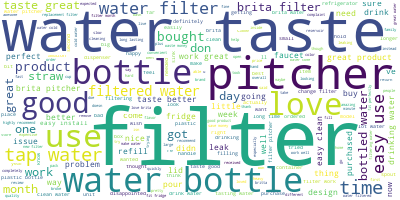

In [28]:
df_Brita['New_TXT'] = df_Brita['P_Text'].apply(lambda x:' '.join(x))

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_Brita['New_TXT'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
     